# Solo Mode Behavioral Clustering

### 1. Objective

The objective of this analysis is to determine whether distinct behavioral archetypes
exist within the reduced Solo feature space derived from PCA.

Specifically, we aim to:

1. Cluster players in the (PC1, PC2) space
2. Determine the optimal number of clusters
3. Interpret behavioral differences between clusters
4. Evaluate whether skill is continuous or segmented

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sns.set_style("whitegrid")

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
})

In [2]:
df = pd.read_csv("../data/Fortnite_players_stats.csv")
df = df[df["Solo matches"] >= 50].copy()

df["Solo_kpm"] = df["Solo kills"] / df["Solo matches"]
df["Solo_mpm"] = df["Solo minutesPlayed"] / df["Solo matches"]
df["Solo_wr"]  = df["Solo top1"] / df["Solo matches"]

features = ["Solo kd", "Solo_kpm", "Solo_mpm"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

pc_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
pc_df["Solo_wr"] = df["Solo_wr"].values

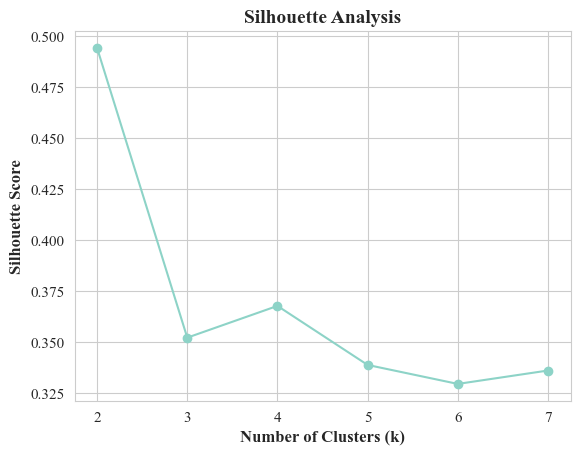

[0.49432708523458047,
 0.35222872656659976,
 0.3678043831705734,
 0.33884819051648846,
 0.3295399939027214,
 0.3361128388192819]

In [3]:
sil_scores = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pc_df[["PC1", "PC2"]])
    score = silhouette_score(pc_df[["PC1", "PC2"]], labels)
    sil_scores.append(score)

plt.figure()
plt.plot(k_range, sil_scores, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

sil_scores

### 2. Optimal Number of Clusters

Silhouette score measures how well-separated clusters are.

Results indicate:

1. The highest silhouette score occurs at k = 2.
2. However, k = 3 provides interpretable behavioral segmentation.
3. Additional clusters reduce separation quality.

Although k = 2 maximizes compactness, k = 3 allows identification
of distinct gameplay archetypes without excessive overlap.

In [4]:
kmeans = KMeans(n_clusters=3, random_state=42)
pc_df["Cluster"] = kmeans.fit_predict(pc_df[["PC1", "PC2"]])

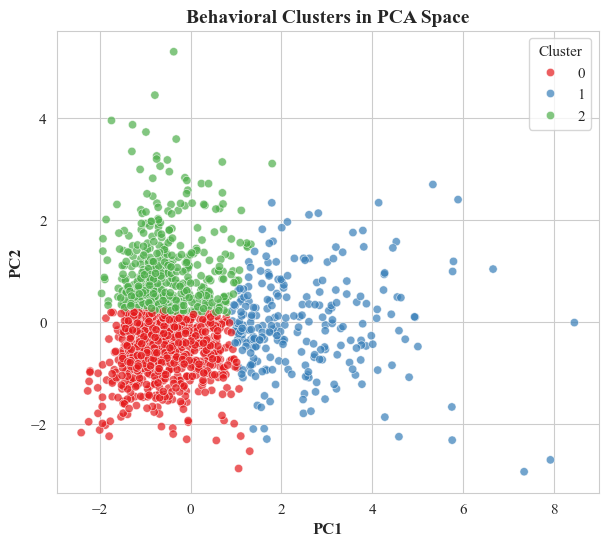

In [5]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=pc_df,
    x="PC1",
    y="PC2",
    hue="Cluster",
    palette="Set1",
    alpha=0.7
)

plt.title("Behavioral Clusters in PCA Space")
plt.show()

### 3. Visual Inspection of Cluster Structure

The PCA space reveals:

1. A clearly separated high-PC1 region (combat-dominant players).
2. A survival-oriented region characterized by high PC2.
3. A low-performance region with negative PC1 and PC2 values.

Clusters appear geometrically meaningful rather than arbitrary partitions.

In [6]:
cluster_profile = pc_df.groupby("Cluster").mean()
cluster_profile

,PC1,PC2,Solo_wr
Cluster,,,
0,-0.550385,-0.589918,0.026020
1,2.437947,-0.052947,0.126973
2,-0.497151,1.000841,0.040353


### 4. Cluster Profiling

Cluster-level averages indicate:

1. Cluster 0
   - Low PC1 and low PC2
   - Lowest win rate
   - Represents low-skill or low-impact players

2. Cluster 1
   - High PC1
   - Highest win rate
   - Represents combat-dominant players

3. Cluster 2
   - Low PC1 but high PC2
   - Moderate win rate
   - Represents survival-oriented players

The results suggest that player behavior is not purely continuous.
Instead, distinct behavioral patterns emerge within the population.

### 5. Conclusions

1. PCA-based clustering reveals meaningful behavioral segmentation in Solo mode.
2. A combat-dominant archetype clearly emerges and exhibits the highest win rate.
3. A survival-oriented archetype exists independently of combat dominance.
4. Low-performance players form a distinct cluster with consistently low success rates.
5. Although silhouette analysis suggests k = 2 as optimal, k = 3 provides richer behavioral interpretation.

These findings indicate that Solo gameplay structure contains discrete behavioral archetypes
rather than a purely continuous skill gradient.

The next step involves formalizing a Skill Index and quantifying its predictive power